# Bias Variance Tradeoff + More Overfitting

When modelling, we are trying to create a useful prediction that can help us in the future. When doing this, we have seen how we need to create a train test split in order to keep ourselves honest in tuning our model to the data itself. Another perspective on this problem of overfitting versus underfitting is the bias variance tradeoff. We can decompose the mean squared error of our models in terms of bias and variance to further investigate.

$ E[(y-\hat{f}(x)^2] = Bias(\hat{f}(x))^2 + Var(\hat{f}(x)) + \sigma^2$
  
  
$Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$  
$Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

<img src="./images/bias_variance.png" alt="Drawing" style="width: 500px;"/>

## 1. Split the data into a test and train set.

In [1]:
import pandas as pd
df = pd.read_excel('./movie_data_detailed_with_ols.xlsx')
def norm(col):
    minimum = col.min()
    maximum = col.max()
    return (col-minimum)/(maximum-minimum)
for col in df:
    try:
        df[col] = norm(df[col])
    except:
        pass
X = df[['budget','imdbRating','Metascore','imdbVotes']]
y = df['domgross']
df.head()

budget  domgross             title  Response_Json      Year  imdbRating  \
0  0.034169  0.055325     21 &amp; Over            NaN  0.997516    0.839506   
1  0.182956  0.023779          Dredd 3D            NaN  0.999503    0.000000   
2  0.066059  0.125847  12 Years a Slave            NaN  1.000000    1.000000   
3  0.252847  0.183719            2 Guns            NaN  1.000000    0.827160   
4  0.157175  0.233625                42            NaN  1.000000    0.925926   

   Metascore  imdbVotes     Model  
0   0.500000   0.384192  0.261351  
1   0.000000   0.000000  0.070486  
2   1.000000   1.000000  0.704489  
3   0.572917   0.323196  0.371052  
4   0.645833   0.137984  0.231656

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

## 2. Fit a regression model to the training data.

In [3]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
model = ols.fit(X_train,y_train)
y_hat_train = model.predict(X_train)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## 2b. Plot the training predictions against the actual data. (Y_hat_train vs Y_train)

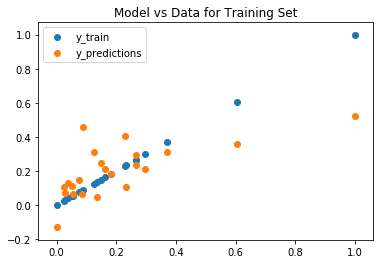

In [5]:
plt.scatter(y_train, y_train, label='y_train')
plt.scatter(y_train, y_hat_train, label='y_predictions')
# plt.scatter(X_train.budget, y_train, label='y_train')
# plt.scatter(X_train.budget, y_hat_train, label='y_predictions')
plt.title('Model vs Data for Training Set')
plt.legend();

## 2c. Plot the test predictions against the actual data. (Y_hat_test vs Y_train)

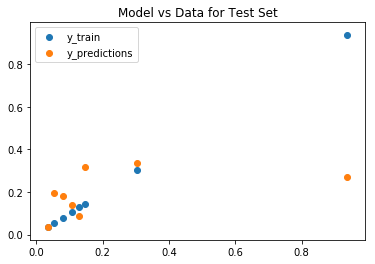

In [6]:
y_hat_test = model.predict(X_test)
plt.scatter(y_test, y_test, label='y_train')
plt.scatter(y_test, y_hat_test, label='y_predictions')
plt.title('Model vs Data for Test Set')
plt.legend();

## 3. Calculating Bias
Write a formula to calculate the bias of a models predictions given the actual data.   
(The expected value can simply be taken as the mean or average value.)  
$Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$  

In [7]:
import numpy as np

In [8]:
def bias(y, y_hat):
    return np.mean(y_hat-y)

## 4. Calculating Variance
Write a formula to calculate the variance of a model's predictions (or any set of data).  
$Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [9]:
def variance(y_hat):
    return np.mean(y_hat**2) - (np.mean(y_hat))**2

## 5. Us your functions to calculate the bias and variance of your model. Do this seperately for the train and test sets.

In [10]:
#Train Set
b = bias(y_train, y_hat_train)
v = variance(y_hat_train)
print('Bias: {} \nVariance: {}'.format(b,v))

Bias: -2.523234146875356e-18 
Variance: 0.02252739508558453


In [11]:
#Test Set
b = bias(y_test, y_hat_test)
v = variance(y_hat_test)
print('Bias: {} \nVariance: {}'.format(b,v))

Bias: -0.028240896674241612 
Variance: 0.010042200158226794


## 6. Describe in words what these numbers can tell you.

* How biased our predictions are, and what the variance is.
* The training set had far less bias (was more accurate) then the test set. The train set also had more variance



## 7. Overfit a new model by creating additional features by raising current features to various powers.

In [12]:
for col in X.columns:
    for i in range(2,9):
        X[col + '^' + str(i)] = df[col]**i

/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
#normalize the data
def norm(col):
    minimum = col.min()
    maximum = col.max()
    return (col-minimum)/(maximum-minimum)

for col in X.columns:
    X[col] = norm(X[col])


#fill nas
X = X.fillna(value=0)


## 8a. Plot your overfitted model's training predictions against the actual data.

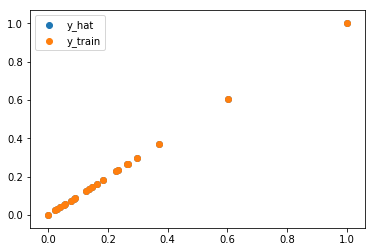

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
new_ols = LinearRegression()
new_model = new_ols.fit(X_train,y_train)
y_hat_new = new_model.predict(X_train)

plt.scatter(y_train, y_hat_new, label='y_hat')
plt.scatter(y_train, y_train, label='y_train')
plt.legend();

## 8b. Calculate the bias and variance for the train set.

In [35]:
print('Bias: ',bias(y_train, y_hat_new))
print('Variance: ',variance(y_hat_new))

Bias:  3.1657126415234934e-15
Variance:  0.048893629909123694


## 9a. Plot your overfitted model's test predictions against the actual data.

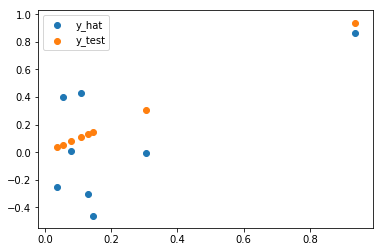

In [38]:
y_hat_test = new_model.predict(X_test)

plt.scatter(y_test, y_hat_test, label='y_hat')
plt.scatter(y_test, y_test, label='y_test')
plt.legend();

## 9b. Calculate the bias and variance for the test set.

In [39]:
print('Bias: ',bias(y_test, y_hat_test))
print('Variance: ',variance(y_hat_test))

Bias:  -0.13970162859373358
Variance:  0.175413123993686


## 10. Describe what you notice about the bias and variance statistics for your overfit model.

#### Bias is higher for train set and variance is higher for test set